In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
from pathlib import Path 

In [66]:
plt.rcParams['figure.figsize'] = (4, 3) 

In [67]:
path_healthy = "../project_folder/data/codex/cellfeaturization_results_healthy.h5ad"
adata_healthy = sc.read_h5ad(path_healthy)

## Healthy

In [68]:
adata_healthy

AnnData object with n_obs × n_vars = 24981 × 355
    obs: 'scportrait_cell_id', 'region', 'shared_leiden_cluster_id'
    uns: 'spatialdata_attrs'

In [69]:
adata_healthy.uns

{'spatialdata_attrs': {'instance_key': 'scportrait_cell_id',
  'region': array(['seg_all_nucleus'], dtype=object),
  'region_key': 'region'}}

In [70]:
sc.tl.pca(adata_healthy)

The data is very low dimensional 

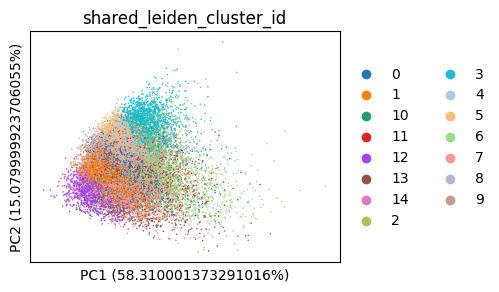

In [71]:
sc.pl.pca(adata_healthy, 
          color="shared_leiden_cluster_id", 
          annotate_var_explained=True)

In [72]:
mean_feature = adata_healthy.X.mean(0)
std_features = adata_healthy.X.std(0)

In [73]:
mean_feature.max()

np.float32(525.45526)

In [74]:
mean_feature.min()

np.float32(0.0)

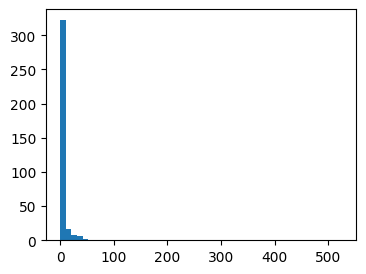

In [75]:
plt.hist(mean_feature, 50)
plt.show()

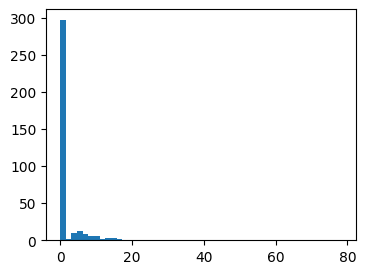

In [76]:
plt.hist(std_features, 50)
plt.show()

Many features are zeros and have zero variance

**Check all zero features**

In [77]:
(adata_healthy.X==0).all(0).sum()

np.int64(26)

26 out of 355 features are zeros for all observations 

**Compute UMAP for visualization**

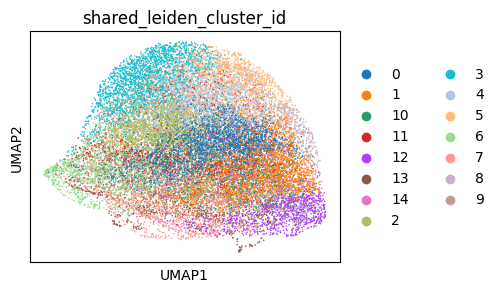

In [78]:
sc.pp.neighbors(adata_healthy)
sc.tl.umap(adata_healthy)
sc.pl.umap(adata_healthy, 
          color="shared_leiden_cluster_id")

Check adata carefully

# Compose a smaller version with feature selection

In [79]:
vars_to_keep = [] 
for var in adata_healthy.var.index:
    if "mean" in var:
        vars_to_keep.append(var)

adata_healthy_preprocessed = adata_healthy[:, vars_to_keep]
adata_healthy_preprocessed.var["stain"] = [var.split("_")[0] for var in adata_healthy_preprocessed.var.index]

adata_healthy_preprocessed.var

/tmp/ipykernel_3673202/3710765488.py:7: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_healthy_preprocessed.var["stain"] = [var.split("_")[0] for var in adata_healthy_preprocessed.var.index]


,stain
DAPI_mean_nucleus,DAPI
CD45_mean_nucleus,CD45
FoxP3_mean_nucleus,FoxP3
HLA-DR_mean_nucleus,HLA-DR
CD103_mean_nucleus,CD103
CHGA_mean_nucleus,CHGA
EGFR_mean_nucleus,EGFR
CD206_mean_nucleus,CD206
GFAP_mean_nucleus,GFAP
PD-1_mean_nucleus,PD-1


## Match to ensemble ID 

In [80]:
import pandas as pd

gene_to_ensemble = pd.read_csv("../project_folder/data/codex/codex_matching_ensembl.tsv", sep="\t")
gene_to_ensemble = gene_to_ensemble.set_index("Codex_Name")

In [81]:
adata_healthy_preprocessed.var["shared_genes"] = gene_to_ensemble.loc[adata_healthy_preprocessed.var.stain]["gene_ids_present_in_dataset"].values
adata_healthy_preprocessed.var["Comment"] = gene_to_ensemble.loc[adata_healthy_preprocessed.var.stain]["Comment"].values

**Remove NaNs**

In [82]:
mask = ~pd.isna(adata_healthy_preprocessed.var.shared_genes)
adata_healthy_preprocessed = adata_healthy_preprocessed[:, mask]

## Final UMAP computation

/home/icb/alessandro.palma/miniconda3/envs/sc_exp_design/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


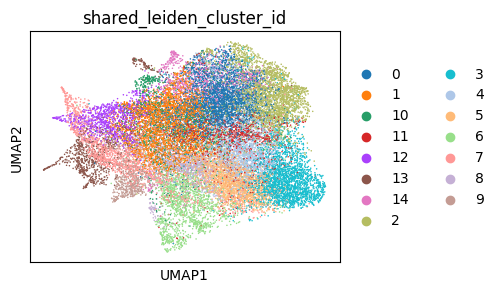

In [83]:
sc.tl.pca(adata_healthy_preprocessed)
sc.pp.neighbors(adata_healthy_preprocessed)
sc.tl.umap(adata_healthy_preprocessed)
sc.pl.umap(adata_healthy_preprocessed, 
          color="shared_leiden_cluster_id")

## Check feature distribution

The range of the features is already ideal

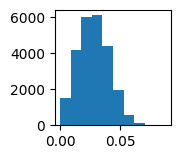

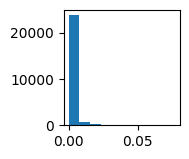

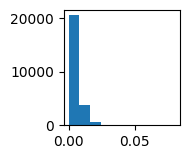

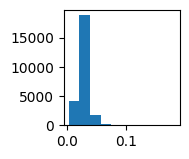

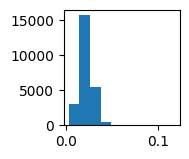

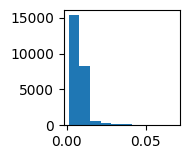

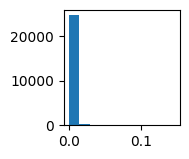

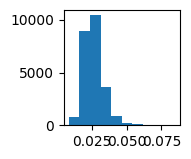

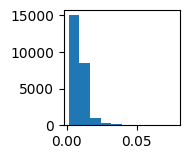

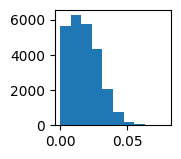

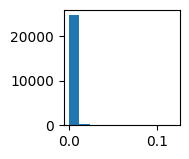

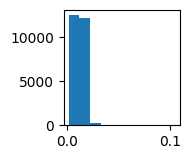

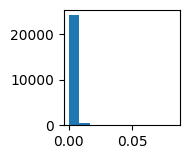

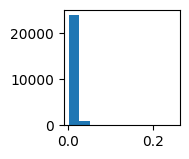

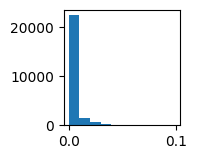

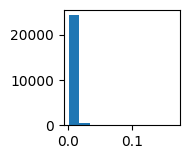

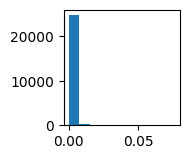

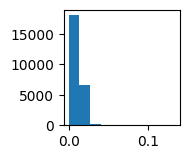

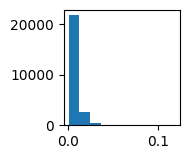

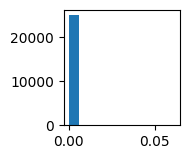

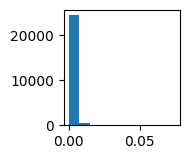

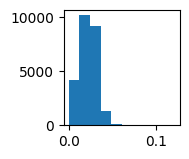

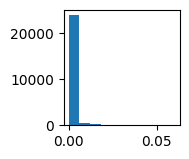

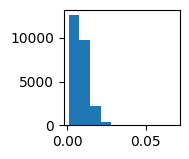

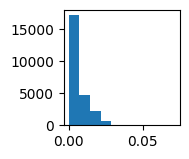

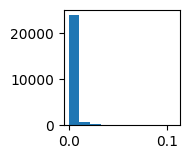

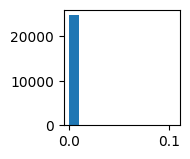

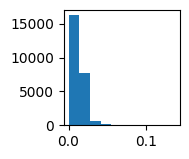

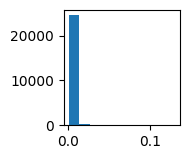

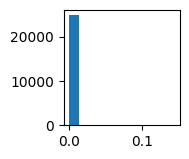

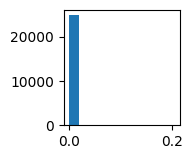

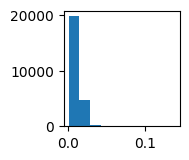

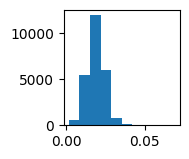

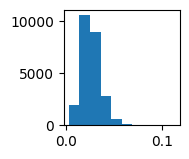

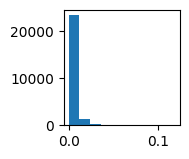

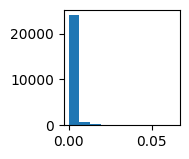

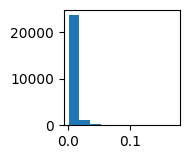

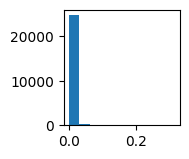

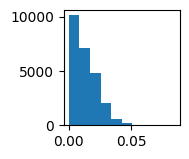

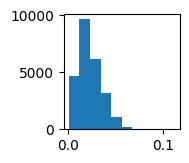

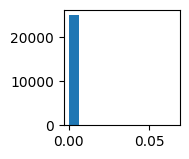

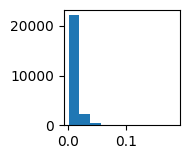

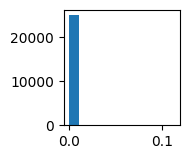

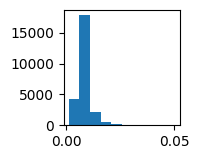

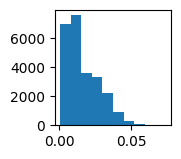

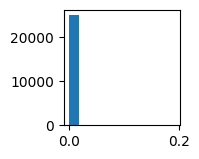

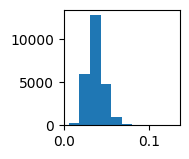

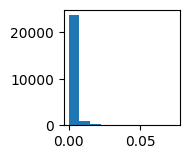

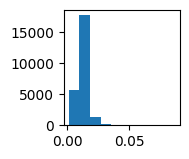

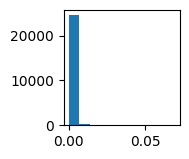

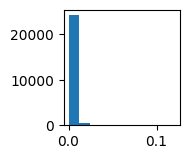

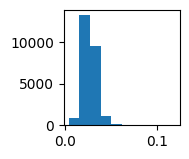

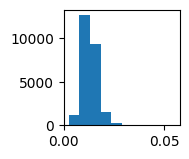

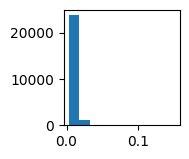

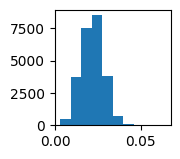

In [84]:
for i in range(adata_healthy_preprocessed.shape[1]):
    plt.figure(figsize=(1.5, 1.5))
    plt.hist(adata_healthy_preprocessed.X[:, i])
    plt.show()

In [85]:
adata_healthy_preprocessed.X.max()

np.float32(0.31543267)

In [86]:
adata_healthy_preprocessed.X.min()

np.float32(0.0)

## Reorder based on external df

In [87]:
adata_healthy_preprocessed.var = adata_healthy_preprocessed.var.set_index("shared_genes", drop=False)
gene_to_ensemble = gene_to_ensemble[gene_to_ensemble['gene_ids_present_in_dataset'].notna()]
adata_healthy_preprocessed = adata_healthy_preprocessed[:, gene_to_ensemble.gene_ids_present_in_dataset]

### Save results

In [88]:
adata_healthy_preprocessed.write_h5ad("../project_folder/data/codex/cellfeaturization_results_healthy_processed.h5ad")

In [89]:
adata_healthy_preprocessed

View of AnnData object with n_obs × n_vars = 24981 × 55
    obs: 'scportrait_cell_id', 'region', 'shared_leiden_cluster_id'
    var: 'stain', 'shared_genes', 'Comment'
    uns: 'spatialdata_attrs', 'pca', 'shared_leiden_cluster_id_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'